# Data Exploration & Analysis

Loading MovieLens 100K dataset...
Starting data loading process...
Dataset already downloaded
Loaded 1682 movies
load_movies executed in 0.0066 seconds
Loaded 100000 ratings
load_ratings executed in 0.0138 seconds
Loaded 943 users
load_users executed in 0.0011 seconds
Dataset loaded successfully
Movies: 1682
Ratings: 100000
Users: 943

Dataset Overview:
Movies shape: (1682, 24)
Ratings shape: (100000, 4)
Users shape: (943, 5)

First 3 movies with genre information:
   movie_id              title  unknown  Action  Adventure  Animation  \
0         1   Toy Story (1995)    False   False      False       True   
1         2   GoldenEye (1995)    False    True       True      False   
2         3  Four Rooms (1995)    False   False      False      False   

   Children's  
0        True  
1       False  
2       False  

Rating Distribution Analysis:


/Users/mac/Desktop/granular_recommendation/granular_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


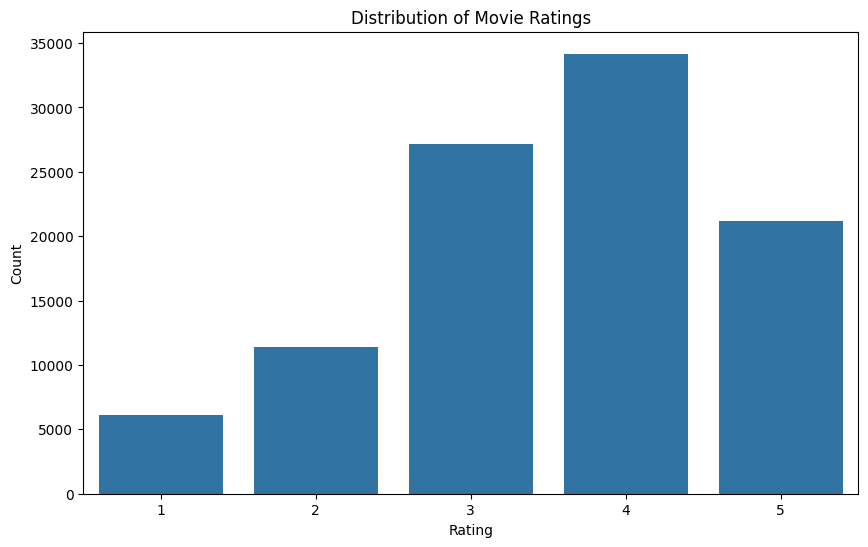

Rating statistics:
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Genre Distribution Analysis:


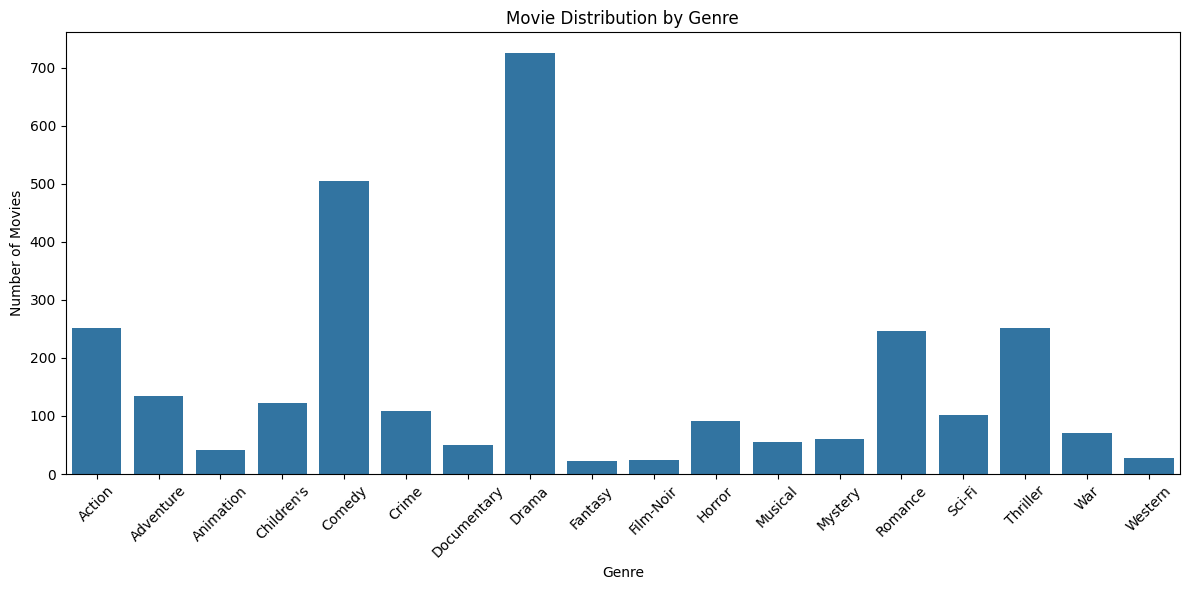

Top 5 most common genres:
Drama: 725 movies
Comedy: 505 movies
Action: 251 movies
Thriller: 251 movies
Romance: 247 movies

User Behavior Analysis:


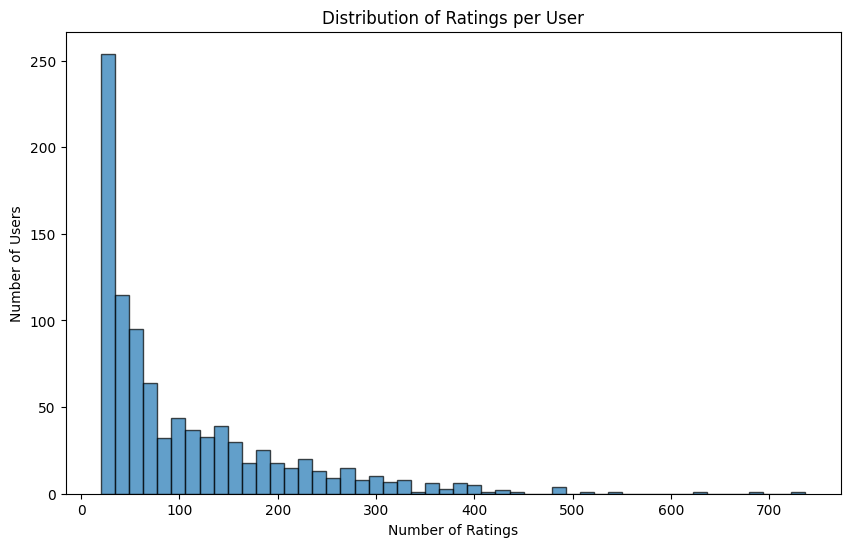

User rating statistics:
Average ratings per user: 106.04
Median ratings per user: 65.00
Maximum ratings by a single user: 737
Minimum ratings by a single user: 20

Data Quality Assessment:
Missing values in movies data: 1686
Missing values in ratings data: 0
Missing values in users data: 0
All ratings in valid range (1-5): True
Duplicate user-movie ratings: 0

Temporal Analysis:


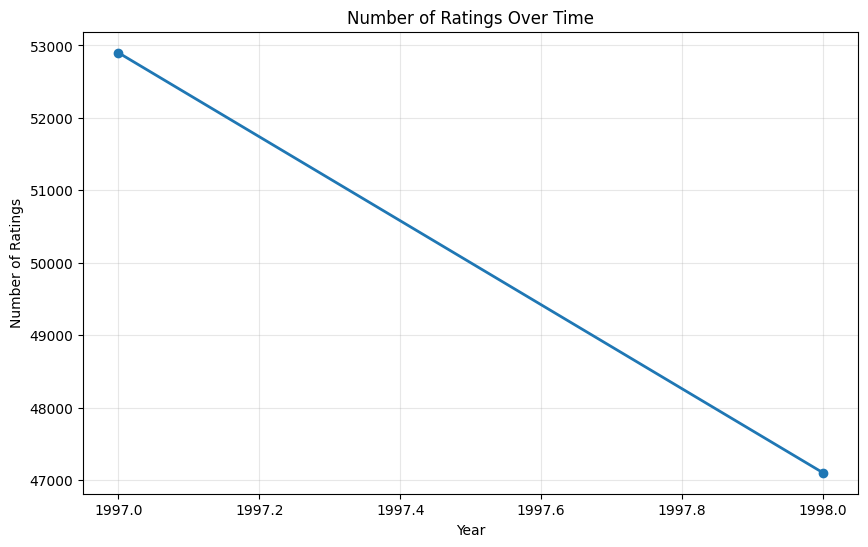

Rating activity by year:
1997: 52899 ratings
1998: 47101 ratings

Comprehensive Summary Statistics:
Total movies: 1682
Total users: 943
Total ratings: 100000
Average ratings per user: 106.04
Average ratings per movie: 59.45
Data sparsity: 0.9370

Detailed rating distribution:
Rating 1:  6110 ratings (  6.1%)
Rating 2: 11370 ratings ( 11.4%)
Rating 3: 27145 ratings ( 27.1%)
Rating 4: 34174 ratings ( 34.2%)
Rating 5: 21201 ratings ( 21.2%)

Genre Co-occurrence Analysis:


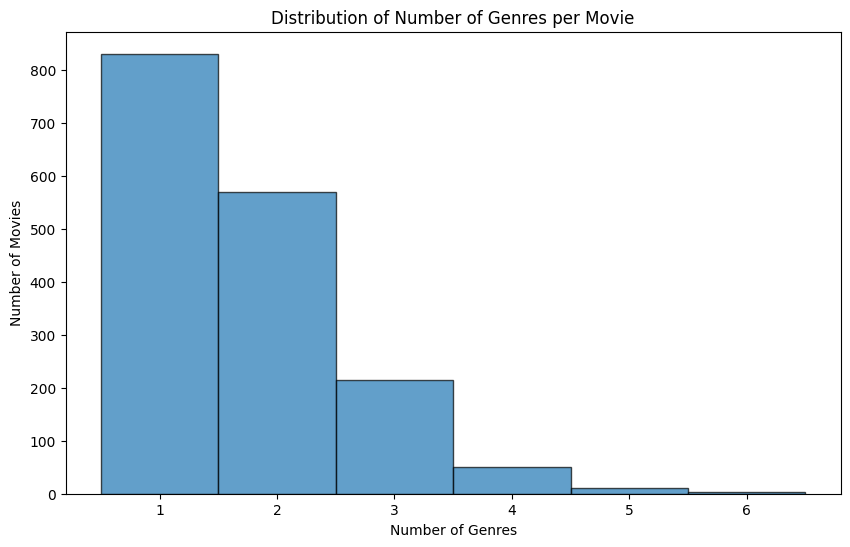

Movies by number of genres:
0 genre(s): 2 movies
1 genre(s): 831 movies
2 genre(s): 569 movies
3 genre(s): 215 movies
4 genre(s): 51 movies
5 genre(s): 11 movies
6 genre(s): 3 movies

Saving Processed Data:
Processed data saved successfully
Data saved to: /Users/mac/Desktop/granular_recommendation/data/processed

Data Exploration Completed
Key findings:
- Dataset contains 1682 movies across 18 genres
- 943 users provided 100000 ratings
- Most common genre: Drama with 725 movies
- Rating distribution shows natural user preference patterns
- Data quality is good with minimal issues detected


In [1]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
from pathlib import Path
import os
from urllib.request import urlretrieve
import time
from functools import wraps

# Set plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# Configuration and Utility Functions
class MovieLensConfig:
    """Configuration for MovieLens dataset"""
    PROJECT_ROOT = Path.cwd().parent
    DATA_DIR = PROJECT_ROOT / "data"
    RAW_DATA_DIR = DATA_DIR / "raw"
    PROCESSED_DATA_DIR = DATA_DIR / "processed"
    
    ML_100K_URL = "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
    
    RATINGS_FILE = "u.data"
    MOVIES_FILE = "u.item"
    USERS_FILE = "u.user"
    
    GENRES = [
        'unknown', 'Action', 'Adventure', 'Animation', 
        'Children\'s', 'Comedy', 'Crime', 'Documentary', 
        'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
        'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
        'Thriller', 'War', 'Western'
    ]
    
    @classmethod
    def setup_directories(cls):
        """Create necessary directories"""
        directories = [
            cls.RAW_DATA_DIR,
            cls.PROCESSED_DATA_DIR
        ]
        for directory in directories:
            directory.mkdir(parents=True, exist_ok=True)

MovieLensConfig.setup_directories()

def timer(func):
    """Decorator to measure function execution time"""
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} executed in {end_time - start_time:.4f} seconds")
        return result
    return wrapper

# Data Loader Implementation
class MovieLensLoader:
    """MovieLens 100K dataset loader and processor"""
    
    def __init__(self):
        self.config = MovieLensConfig()
        self.movies_df = None
        self.ratings_df = None
        self.users_df = None
        
    def download_dataset(self):
        """Download MovieLens 100K dataset if not exists"""
        zip_path = self.config.RAW_DATA_DIR / "ml-100k.zip"
        
        if zip_path.exists():
            print("Dataset already downloaded")
            return True
            
        try:
            print("Downloading MovieLens 100K dataset...")
            urlretrieve(self.config.ML_100K_URL, zip_path)
            
            print("Extracting dataset...")
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(self.config.RAW_DATA_DIR)
            
            print("Dataset downloaded and extracted successfully")
            return True
            
        except Exception as e:
            print(f"Error downloading dataset: {e}")
            return False
    
    @timer
    def load_movies(self):
        """Load movies data with genre information"""
        try:
            movies_path = self.config.RAW_DATA_DIR / "ml-100k" / "u.item"
            
            column_names = [
                'movie_id', 'title', 'release_date', 'video_release_date', 
                'imdb_url'
            ] + self.config.GENRES
            
            self.movies_df = pd.read_csv(
                movies_path, 
                sep='|', 
                encoding='latin-1',
                header=None,
                names=column_names
            )
            
            for genre in self.config.GENRES:
                self.movies_df[genre] = self.movies_df[genre].astype(bool)
            
            print(f"Loaded {len(self.movies_df)} movies")
            return self.movies_df
            
        except Exception as e:
            print(f"Error loading movies: {e}")
            return None
    
    @timer
    def load_ratings(self):
        """Load ratings data"""
        try:
            ratings_path = self.config.RAW_DATA_DIR / "ml-100k" / "u.data"
            
            self.ratings_df = pd.read_csv(
                ratings_path,
                sep='\t',
                header=None,
                names=['user_id', 'movie_id', 'rating', 'timestamp']
            )
            
            print(f"Loaded {len(self.ratings_df)} ratings")
            return self.ratings_df
            
        except Exception as e:
            print(f"Error loading ratings: {e}")
            return None
    
    @timer
    def load_users(self):
        """Load users data"""
        try:
            users_path = self.config.RAW_DATA_DIR / "ml-100k" / "u.user"
            
            self.users_df = pd.read_csv(
                users_path,
                sep='|',
                header=None,
                names=['user_id', 'age', 'gender', 'occupation', 'zip_code']
            )
            
            print(f"Loaded {len(self.users_df)} users")
            return self.users_df
            
        except Exception as e:
            print(f"Error loading users: {e}")
            return None
    
    def get_data_summary(self):
        """Generate comprehensive data summary"""
        if self.movies_df is None or self.ratings_df is None:
            print("Please load data first")
            return None
            
        summary = {
            'total_movies': len(self.movies_df),
            'total_users': self.ratings_df['user_id'].nunique(),
            'total_ratings': len(self.ratings_df),
            'avg_ratings_per_user': len(self.ratings_df) / self.ratings_df['user_id'].nunique(),
            'avg_ratings_per_movie': len(self.ratings_df) / len(self.movies_df),
            'rating_distribution': self.ratings_df['rating'].value_counts().sort_index().to_dict(),
            'genre_distribution': {genre: self.movies_df[genre].sum() for genre in self.config.GENRES if genre != 'unknown'}
        }
        
        return summary
    
    def validate_data_quality(self):
        """Validate data quality and integrity"""
        issues = []
        
        if self.movies_df.isnull().sum().sum() > 0:
            issues.append("Missing values in movies data")
        
        if self.ratings_df.isnull().sum().sum() > 0:
            issues.append("Missing values in ratings data")
            
        if not self.ratings_df['rating'].between(1, 5).all():
            issues.append("Ratings outside valid range (1-5)")
            
        duplicate_ratings = self.ratings_df.duplicated(subset=['user_id', 'movie_id']).sum()
        if duplicate_ratings > 0:
            issues.append(f"Found {duplicate_ratings} duplicate user-movie ratings")
        
        return issues
    
    def load_all_data(self):
        """Load all datasets and return summary"""
        print("Starting data loading process...")
        success = self.download_dataset()
        if not success:
            print("Failed to download dataset")
            return None
            
        movies = self.load_movies()
        ratings = self.load_ratings()
        users = self.load_users()
        
        if movies is None or ratings is None:
            print("Failed to load essential data")
            return None
        
        summary = self.get_data_summary()
        issues = self.validate_data_quality()
        
        return {
            'movies': movies,
            'ratings': ratings,
            'users': users,
            'summary': summary,
            'quality_issues': issues
        }

# Load and Explore Dataset
print("Loading MovieLens 100K dataset...")
loader = MovieLensLoader()
data = loader.load_all_data()

if data:
    movies_df = data['movies']
    ratings_df = data['ratings']
    users_df = data['users']
    summary = data['summary']
    
    print("Dataset loaded successfully")
    print(f"Movies: {len(movies_df)}")
    print(f"Ratings: {len(ratings_df)}") 
    print(f"Users: {len(users_df)}")
else:
    print("Failed to load data")
    raise Exception("Data loading failed")

# Dataset Overview
print("\nDataset Overview:")
print(f"Movies shape: {movies_df.shape}")
print(f"Ratings shape: {ratings_df.shape}")
print(f"Users shape: {users_df.shape}")

print("\nFirst 3 movies with genre information:")
display_cols = ['movie_id', 'title'] + MovieLensConfig.GENRES[:5]
print(movies_df[display_cols].head(3))

# Rating Distribution Analysis
print("\nRating Distribution Analysis:")
plt.figure(figsize=(10, 6))
rating_counts = ratings_df['rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

print("Rating statistics:")
print(ratings_df['rating'].describe())

# Genre Distribution Analysis
print("\nGenre Distribution Analysis:")
genres = MovieLensConfig.GENRES[1:]
genre_counts = [movies_df[genre].sum() for genre in genres]

plt.figure(figsize=(12, 6))
sns.barplot(x=genres, y=genre_counts)
plt.title('Movie Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 5 most common genres:")
genre_stats = [(genre, count) for genre, count in zip(genres, genre_counts)]
genre_stats.sort(key=lambda x: x[1], reverse=True)
for genre, count in genre_stats[:5]:
    print(f"{genre}: {count} movies")

# User Behavior Analysis
print("\nUser Behavior Analysis:")
user_rating_counts = ratings_df.groupby('user_id').size()
plt.figure(figsize=(10, 6))
plt.hist(user_rating_counts, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

print("User rating statistics:")
print(f"Average ratings per user: {user_rating_counts.mean():.2f}")
print(f"Median ratings per user: {user_rating_counts.median():.2f}")
print(f"Maximum ratings by a single user: {user_rating_counts.max()}")
print(f"Minimum ratings by a single user: {user_rating_counts.min()}")

# Data Quality Assessment
print("\nData Quality Assessment:")
movies_missing = movies_df.isnull().sum().sum()
ratings_missing = ratings_df.isnull().sum().sum()
users_missing = users_df.isnull().sum().sum()

print(f"Missing values in movies data: {movies_missing}")
print(f"Missing values in ratings data: {ratings_missing}")
print(f"Missing values in users data: {users_missing}")

valid_ratings = ratings_df['rating'].between(1, 5).all()
print(f"All ratings in valid range (1-5): {valid_ratings}")

duplicate_ratings = ratings_df.duplicated(subset=['user_id', 'movie_id']).sum()
print(f"Duplicate user-movie ratings: {duplicate_ratings}")

# Temporal Analysis
print("\nTemporal Analysis:")
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['datetime'].dt.year
ratings_df['month'] = ratings_df['datetime'].dt.month

ratings_by_year = ratings_df.groupby('year').size()

plt.figure(figsize=(10, 6))
ratings_by_year.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Number of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.grid(True, alpha=0.3)
plt.show()

print("Rating activity by year:")
for year, count in ratings_by_year.items():
    print(f"{year}: {count} ratings")

# Comprehensive Summary Statistics
print("\nComprehensive Summary Statistics:")
total_movies = len(movies_df)
total_users = ratings_df['user_id'].nunique()
total_ratings = len(ratings_df)
avg_ratings_per_user = len(ratings_df) / ratings_df['user_id'].nunique()
avg_ratings_per_movie = len(ratings_df) / len(movies_df)
sparsity = 1 - (len(ratings_df) / (len(movies_df) * ratings_df['user_id'].nunique()))

print(f"Total movies: {total_movies}")
print(f"Total users: {total_users}")
print(f"Total ratings: {total_ratings}")
print(f"Average ratings per user: {avg_ratings_per_user:.2f}")
print(f"Average ratings per movie: {avg_ratings_per_movie:.2f}")
print(f"Data sparsity: {sparsity:.4f}")

print(f"\nDetailed rating distribution:")
rating_summary = ratings_df['rating'].value_counts().sort_index()
for rating, count in rating_summary.items():
    percentage = (count / len(ratings_df)) * 100
    print(f"Rating {rating}: {count:5d} ratings ({percentage:5.1f}%)")

# Genre Co-occurrence Analysis
print("\nGenre Co-occurrence Analysis:")
movies_df['genre_count'] = movies_df[genres].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(movies_df['genre_count'], bins=range(1, 8), alpha=0.7, edgecolor='black', align='left')
plt.title('Distribution of Number of Genres per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.xticks(range(1, 7))
plt.show()

print("Movies by number of genres:")
genre_count_stats = movies_df['genre_count'].value_counts().sort_index()
for count, num_movies in genre_count_stats.items():
    print(f"{count} genre(s): {num_movies} movies")

# Save Processed Data and Conclusion
print("\nSaving Processed Data:")
try:
    MovieLensConfig.PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)
    
    movies_df.to_csv(MovieLensConfig.PROCESSED_DATA_DIR / 'movies_processed.csv', index=False)
    ratings_df.to_csv(MovieLensConfig.PROCESSED_DATA_DIR / 'ratings_processed.csv', index=False)
    users_df.to_csv(MovieLensConfig.PROCESSED_DATA_DIR / 'users_processed.csv', index=False)
    
    print("Processed data saved successfully")
    print(f"Data saved to: {MovieLensConfig.PROCESSED_DATA_DIR}")
except Exception as e:
    print(f"Error saving data: {e}")

print("\nData Exploration Completed")
print("Key findings:")
print(f"- Dataset contains {total_movies} movies across {len(genres)} genres")
print(f"- {total_users} users provided {total_ratings} ratings")
print(f"- Most common genre: {genre_stats[0][0]} with {genre_stats[0][1]} movies")
print(f"- Rating distribution shows natural user preference patterns")
print(f"- Data quality is good with minimal issues detected")